In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("bank_data.csv")
df

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id              600 non-null object
age             600 non-null int64
income          600 non-null float64
children        600 non-null int64
gender          600 non-null object
region          600 non-null object
married         600 non-null object
car             600 non-null object
savings_acct    600 non-null object
current_acct    600 non-null object
mortgage        600 non-null object
pep             600 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [5]:
df.shape

(600, 12)

In [6]:
#Lets drop the ID column
df = df.drop('id', 1)

In [8]:
df_att = df[['age','income','children','gender','region','married', 'car', 'savings_acct', 'current_acct', 'mortgage']]
df_att.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [9]:
target = df.pep
target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [11]:
df_dummies = pd.get_dummies(df_att, prefix=['gender', 'region', 'married','car', 'savings_acct', 'current_acct', 'mortgage'], columns=['gender', 'region', 'married','car', 'savings_acct', 'current_acct', 'mortgage'])
df_dummies

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
596,30,9672.25,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
597,31,15976.30,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
598,29,14711.80,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, target_train, target_test = train_test_split(df_dummies, target, test_size=0.2, random_state=33)
x_train

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,46,32583.50,2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
4,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
86,25,15525.00,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
83,35,16394.40,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
523,34,16291.00,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,28,23124.90,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
201,46,41627.10,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1
578,18,6294.21,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1
391,40,22197.10,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0


In [14]:
from sklearn.preprocessing import minmax_scale
x_train[['income', 'age', 'children']] = minmax_scale(x_train[['income', 'age', 'children']])
x_test[['income', 'age', 'children']] = minmax_scale(x_test[['income', 'age', 'children']])
x_train

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,0.571429,0.462547,0.666667,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
4,0.795918,0.779122,0.000000,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
86,0.142857,0.162411,0.000000,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
83,0.346939,0.177708,0.333333,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
523,0.326531,0.175889,0.000000,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.204082,0.296128,0.000000,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0
201,0.571429,0.621665,0.000000,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1
578,0.000000,0.000000,0.000000,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1
391,0.448980,0.279804,0.000000,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0


In [15]:
## Every column is now between 0 and 1

In [16]:
from sklearn import neighbors, tree, naive_bayes

In [17]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(x_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [21]:
knnpreds = knnclf.predict(x_test)

In [22]:
#lets check out the predictions
print (knnpreds)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'NO']


In [23]:
from sklearn.metrics import classification_report
print(classification_report(target_test, knnpreds))

              precision    recall  f1-score   support

          NO       0.67      0.71      0.69        66
         YES       0.62      0.57      0.60        54

    accuracy                           0.65       120
   macro avg       0.65      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120



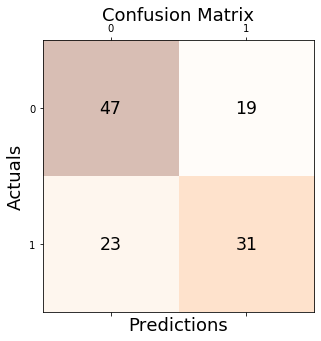

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_true= target_test, y_pred= knnpreds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix1, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [41]:
#lets compute the avregae accuracy score on test set and training set respectively
print (knnclf.score(x_test, target_test))
print (knnclf.score(x_train, target_train))

0.65
1.0


In [42]:
#performing well on the ttraining set and then not on the test set shows an overfitting problem

In [29]:
#lets experiment with lower k
n_neighbors = 2

knnclf1 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf1.fit(x_train, target_train)
knnpreds1 = knnclf1.predict(x_test)
print(classification_report(target_test, knnpreds1))

              precision    recall  f1-score   support

          NO       0.68      0.67      0.67        66
         YES       0.60      0.61      0.61        54

    accuracy                           0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120



In [30]:
#the accuracy decreases with lower k

In [31]:
#lets experiment with higher k
n_neighbors = 7

knnclf2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf2.fit(x_train, target_train)
knnpreds2 = knnclf2.predict(x_test)
print(classification_report(target_test, knnpreds2))

              precision    recall  f1-score   support

          NO       0.67      0.73      0.70        66
         YES       0.62      0.56      0.59        54

    accuracy                           0.65       120
   macro avg       0.65      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120



In [32]:
#the accuracy stays the same as k = 5

In [34]:
#lets try a different parameter for weights other than distance
n_neighbors = 5

knnclf3 = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf3.fit(x_train, target_train)
knnpreds3 = knnclf3.predict(x_test)
print(classification_report(target_test, knnpreds3))

              precision    recall  f1-score   support

          NO       0.67      0.70      0.68        66
         YES       0.61      0.57      0.59        54

    accuracy                           0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120



In [35]:
##still the accuracy does not improve, it actually decreases a bit

In [36]:
#lets experiment with higher k than 7
n_neighbors = 9

knnclf4 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf4.fit(x_train, target_train)
knnpreds4 = knnclf4.predict(x_test)
print(classification_report(target_test, knnpreds4))

              precision    recall  f1-score   support

          NO       0.68      0.70      0.69        66
         YES       0.62      0.59      0.60        54

    accuracy                           0.65       120
   macro avg       0.65      0.64      0.65       120
weighted avg       0.65      0.65      0.65       120



In [40]:
#The accuracy does not seem to be increasing by experiemnting with lower and higher values of k than 5
#The accuracy also does not seem be improving with a different weights paramter other than distance
#The best result I am able to get is accuracy of 65% with k = 5 and distance parameter for weights

In [44]:
#lets try the decsion tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(x_train, target_train)
treepreds = treeclf.predict(x_test)
print (treepreds)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [45]:
print (treeclf.score(x_test, target_test))
print (treeclf.score(x_train, target_train))

0.7583333333333333
0.9854166666666667


In [49]:
#The training accurcay is much better than the tetsing accurcay and this means there is an overfitting
#problem since it is doing well on the training sets, but when it seees new instances in the test set,
#it does not generalize well to the test set
#this means there could be more variance than we need in the bias variance trade off, we ideall want =
#low bias and low varaince in our model. To reduce the varaince, one could use validation curves to plot
#hyper parameter values against training and testing accuracy to tune the model better to reduce variance

In [46]:
print(classification_report(target_test, treepreds))

              precision    recall  f1-score   support

          NO       0.78      0.79      0.78        66
         YES       0.74      0.72      0.73        54

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120



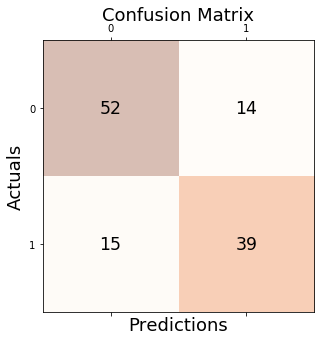

In [47]:
conf_matrix2 = confusion_matrix(y_true= target_test, y_pred= treepreds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix2, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix2.shape[0]):
    for j in range(conf_matrix2.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix2[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [50]:
#lets try naiave bayes now
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(x_train, target_train)
nbpreds = nbclf.predict(x_test)
print (nbpreds)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'NO']


In [51]:
print (nbclf.score(x_train, target_train))
print (nbclf.score(x_test, target_test))

0.6708333333333333
0.6


In [55]:
#The training accuracy is not much higher than the testing accuracy in Naive Bayes, this means
#there is not much of an issue in overfitting here and there is not a very high varaince in this model
#when it comes to the bias varaince trade off 

In [52]:
print(classification_report(target_test, nbpreds))

              precision    recall  f1-score   support

          NO       0.63      0.67      0.65        66
         YES       0.56      0.52      0.54        54

    accuracy                           0.60       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.60      0.60      0.60       120



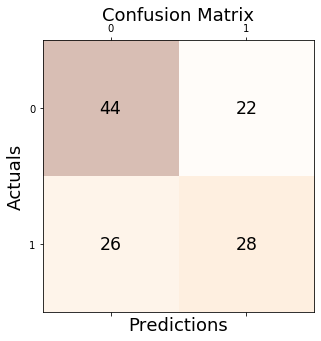

In [53]:
conf_matrix3 = confusion_matrix(y_true= target_test, y_pred= nbpreds)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix3, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix3.shape[0]):
    for j in range(conf_matrix3.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix3[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()